# 📓 Hands-on Machine Learning: Decision Tree & KNN (Titanic Dataset)

# - Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# - Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# - Exploratory Data Analysis (EDA)

/tmp/ipython-input-3273066106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


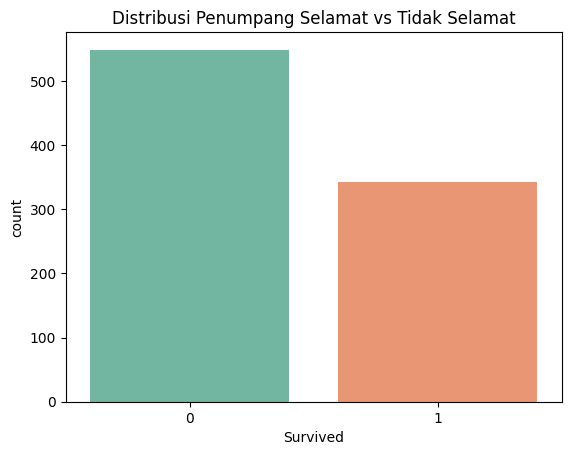

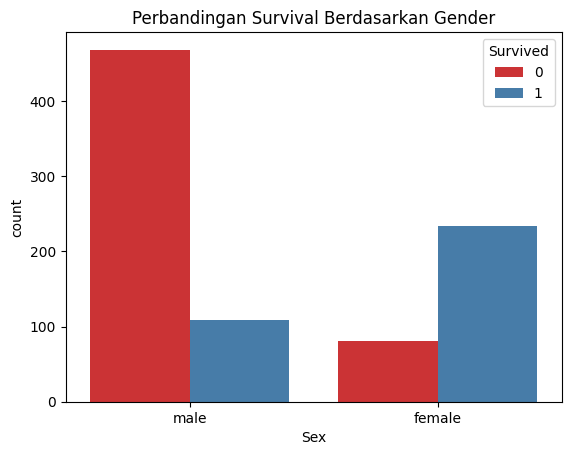

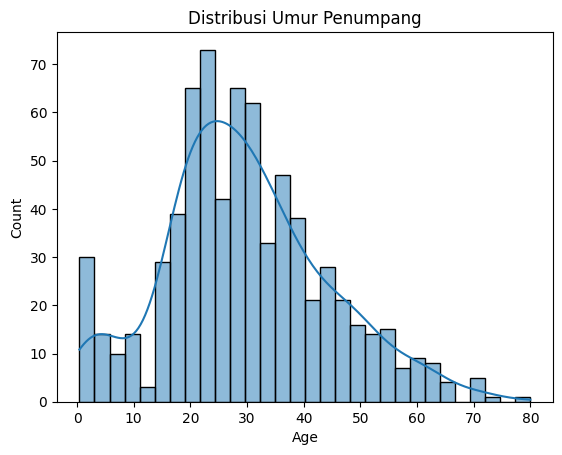

In [ ]:
# Distribusi target
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Distribusi Penumpang Selamat vs Tidak Selamat")
plt.show()

# Survival berdasarkan gender
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Perbandingan Survival Berdasarkan Gender")
plt.show()

# Distribusi umur
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Distribusi Umur Penumpang")
plt.show()


# - Preprocessing Data

In [ ]:
# Hapus kolom tidak relevan
df = df.drop(["Name","Ticket","Cabin"], axis=1)

# Isi missing value
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)

# Encode kolom kategorikal
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

# Pisahkan fitur dan target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-4132469950.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-4132469950.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# - Split Train dan Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# - Decision Tree Model

Accuracy Decision Tree: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       110
           1       0.83      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



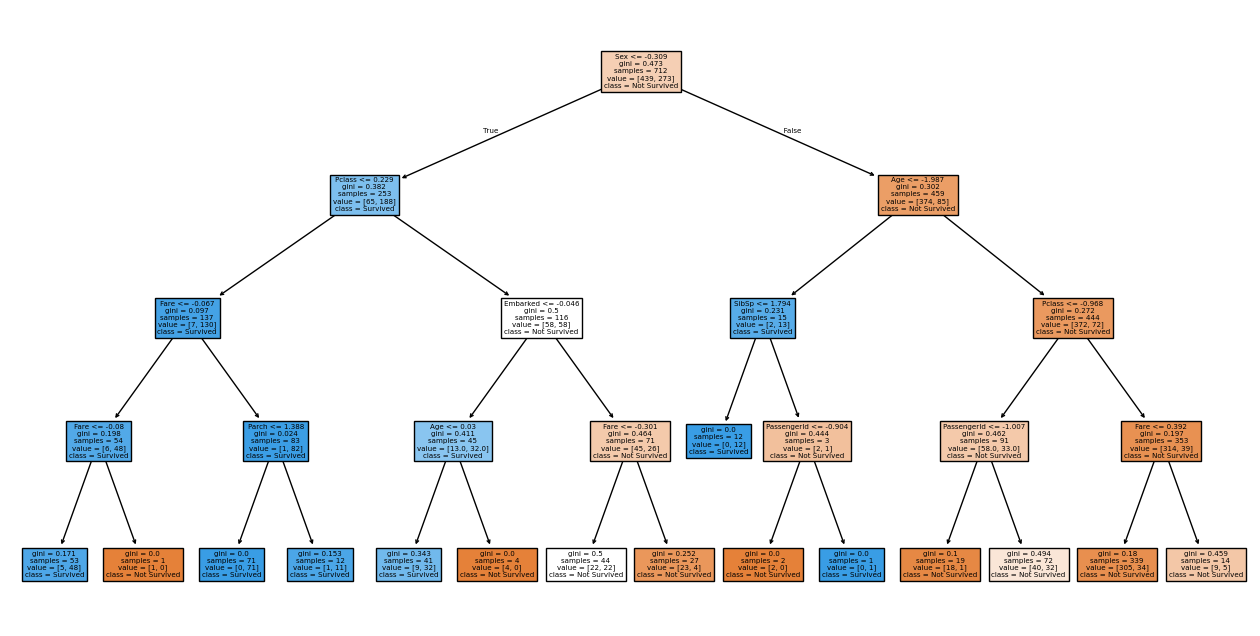

In [ ]:
# Latih model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Evaluasi
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualisasi pohon
plt.figure(figsize=(16,8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Not Survived","Survived"])
plt.show()


# - KNN Model

Accuracy KNN: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



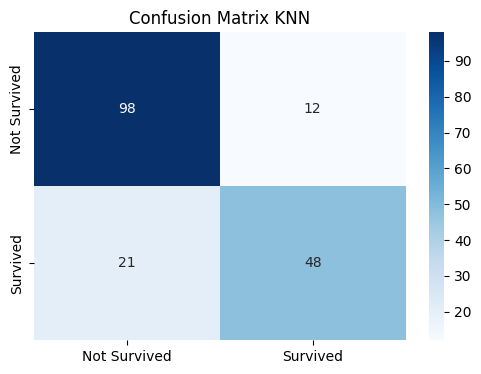

In [ ]:
# Latih model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived","Survived"], yticklabels=["Not Survived","Survived"])
plt.title("Confusion Matrix KNN")
plt.show()


# - Perbandingan Hasil

/tmp/ipython-input-3088266324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")


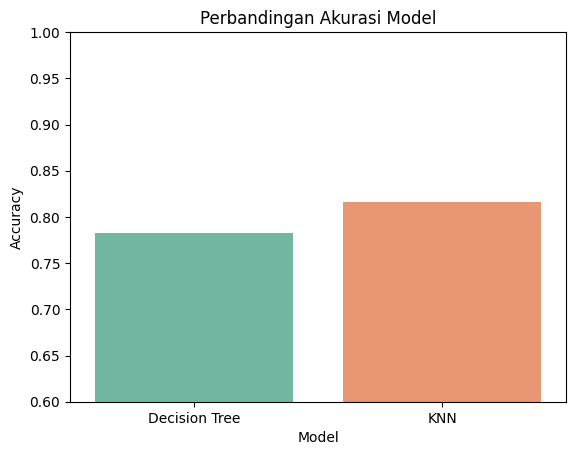

In [ ]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "KNN"],
    "Accuracy": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn)]
})

sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")
plt.title("Perbandingan Akurasi Model")
plt.ylim(0.6,1)
plt.show()


# - Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning Decision Tree
for depth in [2, 4, 6, 8, 10]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(f"Depth {depth}: Accuracy = {accuracy_score(y_test, y_pred):.4f}")

# Hyperparameter Tuning KNN
for k in range(1, 16, 2):  # coba k ganjil biar voting gak seri
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k = {k}: Accuracy = {accuracy_score(y_test, y_pred):.4f}")


Depth 2: Accuracy = 0.7598
Depth 4: Accuracy = 0.7821
Depth 6: Accuracy = 0.7263
Depth 8: Accuracy = 0.7765
Depth 10: Accuracy = 0.7989
k = 1: Accuracy = 0.7542
k = 3: Accuracy = 0.7486
k = 5: Accuracy = 0.7877
k = 7: Accuracy = 0.8156
k = 9: Accuracy = 0.8045
k = 11: Accuracy = 0.7989
k = 13: Accuracy = 0.7989
k = 15: Accuracy = 0.7989


# - Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
scores_dt = cross_val_score(dt, X_scaled, y, cv=5)
print("Decision Tree CV Accuracy:", scores_dt.mean())

# Cross-validation KNN
knn = KNeighborsClassifier(n_neighbors=7)
scores_knn = cross_val_score(knn, X_scaled, y, cv=5)
print("KNN CV Accuracy:", scores_knn.mean())


Decision Tree CV Accuracy: 0.7790659720042684
KNN CV Accuracy: 0.7990961019396146


# - Feature Importance (khusus Decision Tree)

/tmp/ipython-input-3957466704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


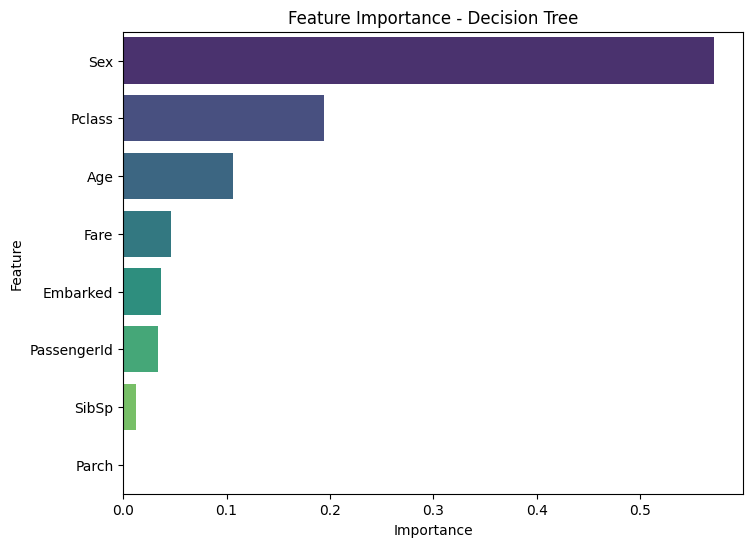

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Visualisasi feature importance
importances = dt_model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance - Decision Tree")
plt.show()


# - Error Analysis (Analisis Kesalahan)

In [ ]:
# Ambil prediksi yang salah
misclassified = X_test[(y_test != y_pred_dt)]
print("Contoh data yang salah diprediksi oleh Decision Tree:")
print(misclassified[:5])


Contoh data yang salah diprediksi oleh Decision Tree:
[[ 0.41989137  0.82737724  0.73769513 -0.56573646 -0.4745452  -0.47367361
  -0.50294854 -1.9423032 ]
 [ 0.44321867  0.82737724 -1.35557354  0.51016135  0.43279337 -0.47367361
  -0.2980781   0.58595414]
 [-0.89032522  0.82737724 -1.35557354 -0.18148724 -0.4745452  -0.47367361
  -0.48885426  0.58595414]
 [-0.64538859  0.82737724 -1.35557354  0.4333115   0.43279337  0.76762988
  -0.24069424  0.58595414]
 [ 1.03806477 -1.56610693  0.73769513  1.43235947  0.43279337 -0.47367361
   0.39858208  0.58595414]]


# - Simpan Model untuk Deployment

In [ ]:
import joblib

# Simpan model
joblib.dump(dt_model, "decision_tree_titanic.pkl")
joblib.dump(knn_model, "knn_titanic.pkl")

# Load ulang model
loaded_dt = joblib.load("decision_tree_titanic.pkl")
